# Tesla Stock Market prediction based on Elon Musk Tweet Interaction

In [36]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import numpy as np

In [2]:
tesla_stock_data = pd.read_csv("TSLA.csv")
elon_tweets_data = pd.read_csv("TweetsElonMusk.csv")

## Describing Datasets

### Tesla Data

In [3]:
tesla_stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


### Elon Musk Data

In [4]:
elon_tweets_data.describe()

,id,conversation_id,timezone,user_id,place,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.256200e+04,1.256200e+04,12562.0,12562.0,0.0,12562.000000,12562.000000,1.256200e+04,12562.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.049919e+18,1.047490e+18,300.0,44196397.0,NaN,679.370005,2256.727193,2.147006e+04,0.063047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.761981e+17,2.783202e+17,0.0,0.0,NaN,2453.853763,9793.382524,6.727787e+04,0.243058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.543473e+10,1.659576e+09,300.0,44196397.0,NaN,0.000000,0.000000,2.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.444958e+17,9.413883e+17,300.0,44196397.0,NaN,45.000000,45.000000,8.790000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.117568e+18,1.117117e+18,300.0,44196397.0,NaN,113.000000,144.500000,2.439500e+03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.255896e+18,1.254922e+18,300.0,44196397.0,NaN,373.000000,847.750000,1.128250e+04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.383296e+18,1.383296e+18,300.0,44196397.0,NaN,61349.000000,361461.000000,1.593425e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Combine Datasets and Refine

In [5]:
refined_elon = DataFrame(elon_tweets_data, columns=['replies_count', 'retweets_count', 'likes_count', 'date'])
refined_tesla_stock = DataFrame(tesla_stock_data, columns=['High', 'Low', 'Date'])
refined_tesla_stock = refined_tesla_stock.rename(columns={'Date': 'date'})

In [6]:
sorted_elon = refined_elon.sort_values(by='date', ascending=True)
sorted_tesla = refined_tesla_stock.sort_values(by='date', ascending=True)

#### Merged dataframes

In [7]:
data_merged = pd.merge(refined_elon, refined_tesla_stock, on='date', how='inner')
# create everage row
data_merged['average_stock'] = (data_merged['High'] + data_merged['Low']) /2

data_merged.columns

Index(['replies_count', 'retweets_count', 'likes_count', 'date', 'High', 'Low',
       'average_stock'],
      dtype='object')

## Data clean and Analysis

### Null values

In [8]:
data_merged.to_csv('data.csv', index=False)
pd.isnull(data_merged).any()

replies_count     False
retweets_count    False
likes_count       False
date              False
High              False
Low               False
average_stock     False
dtype: bool

Data has no null values

### Min values each column

In [9]:
data_merged.min()

replies_count              0
retweets_count             0
likes_count                2
date              2011-12-01
High                   5.376
Low                    4.528
average_stock          5.114
dtype: object

### Max values each column

In [10]:
data_merged.max()

replies_count          57987
retweets_count        301391
likes_count          1593425
date              2021-04-16
High              900.400024
Low               871.599976
average_stock         883.75
dtype: object

### Mean(average) values each column

In [11]:
data_merged.mean(numeric_only=True)

replies_count       685.899456
retweets_count     2260.268888
likes_count       21401.644336
High                163.749719
Low                 155.572628
average_stock       159.661173
dtype: float64

## Data Info

In [12]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8643 entries, 0 to 8642
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   replies_count   8643 non-null   int64  
 1   retweets_count  8643 non-null   int64  
 2   likes_count     8643 non-null   int64  
 3   date            8643 non-null   object 
 4   High            8643 non-null   float64
 5   Low             8643 non-null   float64
 6   average_stock   8643 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 540.2+ KB


## Dependent and Independent variables

In [13]:
y = DataFrame(data_merged, columns=['average_stock'])
x = DataFrame(data_merged, columns=['replies_count', 'retweets_count', 'likes_count'])

# data = pd.get_dummies(data, columns=['job'], prefix='is')

### Test Splits and Model Training

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=24)

regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [15]:
print("Intercept", regr.intercept_)
coef_data = regr.coef_.reshape(-1, 1)
pd.DataFrame(data=coef_data, index=x_train.columns, columns=['coef'])

Intercept [139.64593628]


,coef
replies_count,0.011116
retweets_count,-0.008764
likes_count,0.001465


In [16]:
# From the coefficient above we clearly see that the reply count has the most significant impact on the stock price. But only very little.

### Model Accuracy with R-Squared

In [17]:
print('Trainng data r-squared:', regr.score(x_train, y_train))
print('Test data r-squared:', regr.score(x_test, y_test))

Trainng data r-squared: 0.10322181866978375
Test data r-squared: 0.11446396098382661


In [18]:
# from the r-squared results we see that our model are not the most accurate.

## Test Non Accurate Model

In [19]:
input_tweet = {
    'replies_count': 107,
    'retweets_count': 60,
    'likes_count': 2000,  
}

# Create a DataFrame with the input data
input_df = pd.DataFrame(input_tweet, index=[0])


# Use the model to make a prediction
predicted_stock = regr.predict(input_df)

print(f'Predicted Average Stock: {predicted_stock[0]}')

Predicted Average Stock: [143.24038732]


## Refine Model and Data

### Test Data For Correlations


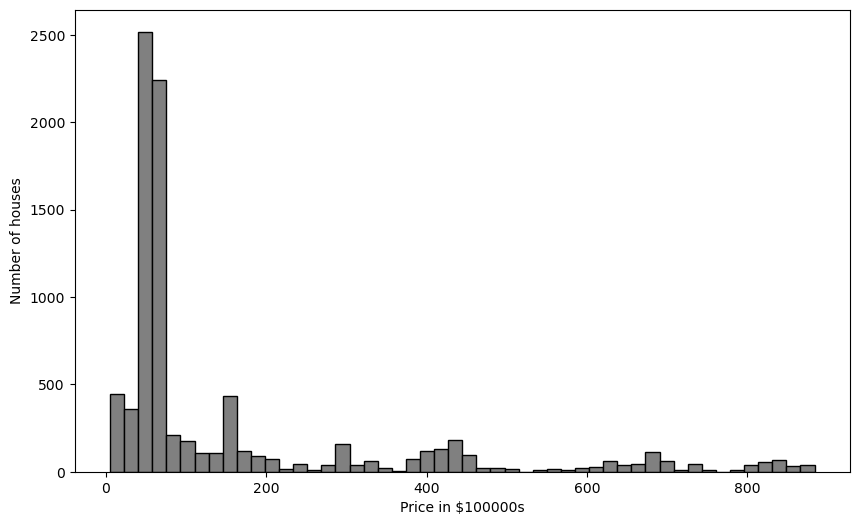

In [40]:
plt.figure(figsize=(10,6))
plt.hist(data_merged['average_stock'], bins=50, ec='black', color='gray')
plt.xlabel("Price in $100000s")
plt.ylabel('Number of houses')
plt.show()

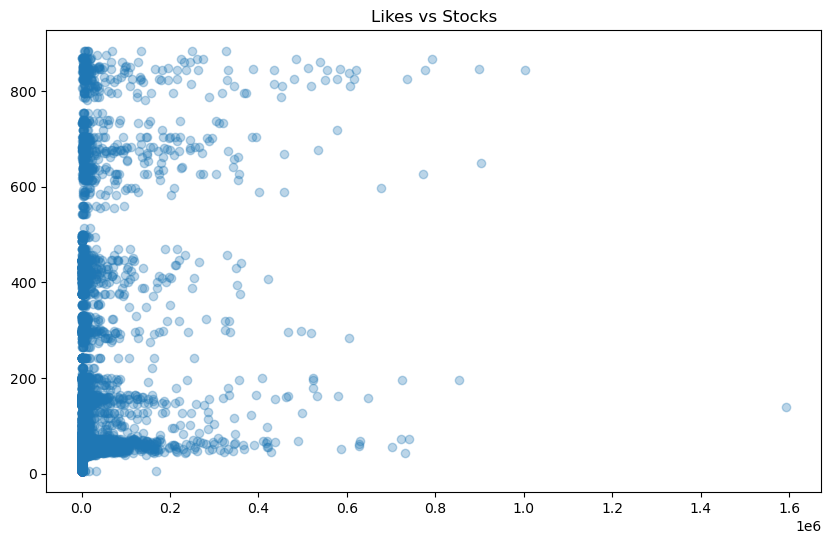

In [41]:


plt.figure(figsize=(10,6))
plt.scatter(x["likes_count"], y, alpha=0.3)
plt.title('Likes vs Stocks')
plt.show()


In [43]:
y_log = np.log(data_merged["average_stock"])

In [44]:
y_log.skew()

0.25110902277795066

In [45]:
y.skew()

average_stock    1.991316
dtype: float64

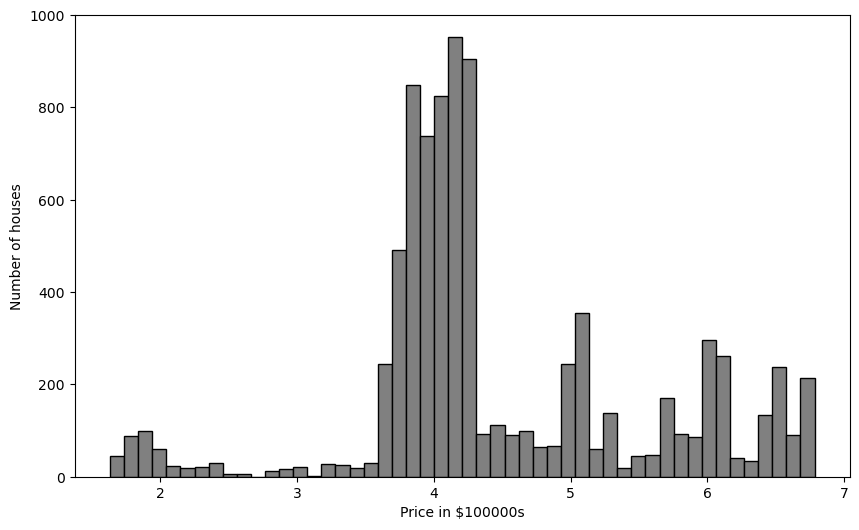

In [47]:
plt.figure(figsize=(10,6))
plt.hist(y_log, bins=50, ec='black', color='gray')
plt.xlabel("Price in $100000s")
plt.ylabel('Number of houses')
plt.show()